In [32]:
#From https://www.kaggle.com/mchirico/santas-uncertain-bags/santa-quick-look
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set_style('whitegrid')
np.random.seed(1234)
data = pd.read_csv('gifts.csv')
%matplotlib inline

In [33]:
def gifts(gType):
    if gType == "horse":
        return max(0, np.random.normal(5,2,1)[0])
    elif gType == "ball":
        return max(0, 1 + np.random.normal(1,0.3,1)[0])
    elif gType == "bike":
        return max(0, np.random.normal(20,10,1)[0])
    elif gType == "train":
        return max(0, np.random.normal(10,5,1)[0])
    elif gType == "coal":
        return 47 * np.random.beta(0.5,0.5,1)[0]
    elif gType == "book":
        return np.random.chisquare(2,1)[0]
    elif gType == "doll":
        return np.random.gamma(5,1,1)[0]
    elif gType == "blocks":
        return np.random.triangular(5,10,20,1)[0]
    elif gType == "gloves":
        return 3.0 + np.random.rand(1)[0] if np.random.rand(1) < 0.3 else np.random.rand(1)[0]
    else :
        print("Wrong Arguement")


In [36]:
data['type'] = data['GiftId'].apply(lambda x: x.split('_')[0])
data['id'] = data['GiftId'].apply(lambda x: x.split('_')[1])
data['weight'] = data['type'].apply(lambda x: gifts(x))
data.head(3)

,GiftId,type,id,weight
0,horse_0,horse,0,4.136224
1,horse_1,horse,1,8.290277
2,horse_2,horse,2,4.823715


//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


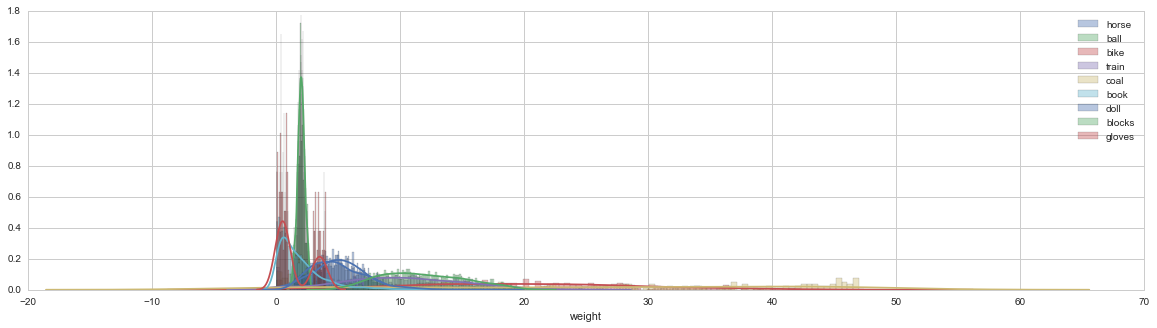

In [45]:
plt.figure(figsize= (20,5))
sns.distplot(data[data['type']=='horse'] ['weight'],bins=100, label="horse" );
sns.distplot(data[data['type']=='ball'] ['weight'],bins=100,  label="ball"  );
sns.distplot(data[data['type']=='bike']['weight'],bins=100,   label="bike"  );
sns.distplot(data[data['type']=='train']['weight'],bins=100,  label="train" );
sns.distplot(data[data['type']=='coal']['weight'],bins=100,   label="coal"  );
sns.distplot(data[data['type']=='book']['weight'],bins=100,   label="book"  );
sns.distplot(data[data['type']=='doll']['weight'],bins=100,   label="doll"  );
sns.distplot(data[data['type']=='blocks']['weight'],bins=100,   label="blocks"  );
sns.distplot(data[data['type']=='gloves']['weight'],bins=100,   label="gloves"  );
plt.legend()

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


----------------
 Avg Weights: 


,type,weight
0,ball,2.012458
1,bike,19.550956
2,blocks,11.795440
3,book,2.000068
4,coal,24.435515
5,doll,5.028566
6,gloves,1.519660
7,horse,4.974722
8,train,10.038286


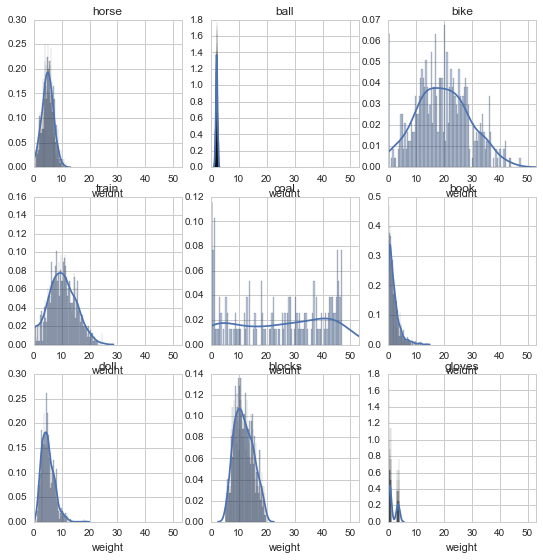

In [58]:
n_iter = 10
presents = ['horse', 'ball', 'bike', 'train', 'coal', 'book', 'doll', 'blocks', 'gloves']
# n_presents = [1000, 1100, 500, 1000, 166, 1200, 1000, 1000, 200]
n_presents = 1000
p = np.empty([len(presents), n_presents*n_iter])

mean_of_weights = data[["type", "weight"]].groupby(['type'],as_index=False).mean()

pylab.rcParams['figure.figsize'] = 9, 9
fig = plt.figure()
for i, present in enumerate(presents):
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_title(present)
    g = sns.distplot(data[data['type']==presents[i]] ['weight'],bins=100, label=presents[i] );
    g.set(xlim=(0, 53))

print ("----------------\n Avg Weights: ")
mean_of_weights.head(9)
